In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('Position_Salaries.csv')

x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print(x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
# Converting y to 2D Array

y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [8]:
print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [16]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor = regressor.fit(x,y)


C:\Users\Hrishabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))



array([[252789.13921624]])

ValueError: x and y must have same first dimension, but have shapes (10, 1) and (1, 1)

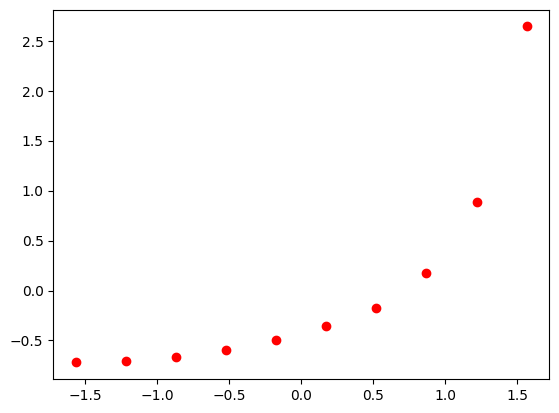

In [19]:
plt.scatter(sc_x.inverse_transform(x),y,color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()